In [1]:
import pandas as pd
import plotly.express as px
from nomiden import reader as nr

In [2]:
customer = pd.read_csv('data/customer_all.csv')
customer.head()

,CustomerID,NIK,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
0,1,5203172209040014,15000000,39,Healthcare,1,4
1,2,1705032211020016,35000000,81,Engineer,3,3
2,3,7606055105030001,86000000,6,Engineer,1,1
3,4,7317074601000015,59000000,77,Lawyer,0,2
4,5,3215114911920008,38000000,40,Entertainment,2,6


In [3]:
nik_generate = pd.DataFrame(customer['NIK'].apply(lambda x: nr.NIK(x).all_info).tolist())
nik_generate.head()

,NIK,province,city,district,gender,birth_datetime,birthday,age,regist_code
0,5203172209040014,NUSA TENGGARA BARAT,KAB. LOMBOK TIMUR,Labuhan Haji,Male,2004-09-22,22 September 2004,19,14
1,1705032211020016,BENGKULU,KAB. SELUMA,Talo,Male,2002-11-22,22 November 2002,21,16
2,7606055105030001,SULAWESI BARAT,KAB. MAMUJU TENGAH,Karossa,Female,2003-05-11,11 May 2003,20,1
3,7317074601000015,SULAWESI SELATAN,KAB. LUWU,Belopa,Female,2000-01-06,06 January 2000,23,15
4,3215114911920008,JAWA BARAT,KAB. KARAWANG,Cibuaya,Female,1992-11-09,09 November 1992,31,8


merge data

In [4]:
customer_merge = customer.merge(right=nik_generate, on='NIK')
customer_merge.head()

,CustomerID,NIK,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size,province,city,district,gender,birth_datetime,birthday,age,regist_code
0,1,5203172209040014,15000000,39,Healthcare,1,4,NUSA TENGGARA BARAT,KAB. LOMBOK TIMUR,Labuhan Haji,Male,2004-09-22,22 September 2004,19,14
1,2,1705032211020016,35000000,81,Engineer,3,3,BENGKULU,KAB. SELUMA,Talo,Male,2002-11-22,22 November 2002,21,16
2,3,7606055105030001,86000000,6,Engineer,1,1,SULAWESI BARAT,KAB. MAMUJU TENGAH,Karossa,Female,2003-05-11,11 May 2003,20,1
3,4,7317074601000015,59000000,77,Lawyer,0,2,SULAWESI SELATAN,KAB. LUWU,Belopa,Female,2000-01-06,06 January 2000,23,15
4,5,3215114911920008,38000000,40,Entertainment,2,6,JAWA BARAT,KAB. KARAWANG,Cibuaya,Female,1992-11-09,09 November 1992,31,8


In [5]:
customer_merge.dtypes

CustomerID                  int64
NIK                         int64
Annual_Income               int64
Spending_Score              int64
Profession                 object
Work_Experience             int64
Family_Size                 int64
province                   object
city                       object
district                   object
gender                     object
birth_datetime     datetime64[ns]
birthday                   object
age                         int64
regist_code                 int64
dtype: object

In [6]:
customer_merge['birth_year'] = customer_merge['birth_datetime'].dt.year

In [7]:
customer_merge['gender'] = customer_merge['gender'].astype('category')
customer_merge['Profession'] = customer_merge['Profession'].astype('category')

In [8]:
customer_merge.dtypes

CustomerID                  int64
NIK                         int64
Annual_Income               int64
Spending_Score              int64
Profession               category
Work_Experience             int64
Family_Size                 int64
province                   object
city                       object
district                   object
gender                   category
birth_datetime     datetime64[ns]
birthday                   object
age                         int64
regist_code                 int64
birth_year                  int32
dtype: object

binning

In [9]:
import numpy as np

gen_bins =  [1945, 1964, 1980, 1996, 2012]
gen_names = ['Boomers', 'Gen. X', 'Gen. Y (Millenials)', 'Gen. Z (Zoomers)']

# simpan ke kolom 'generation'
customer_merge['generation'] = pd.cut(x=customer_merge['birth_year'], bins=gen_bins, labels=gen_names)
customer_merge.head()

,CustomerID,NIK,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size,province,city,district,gender,birth_datetime,birthday,age,regist_code,birth_year,generation
0,1,5203172209040014,15000000,39,Healthcare,1,4,NUSA TENGGARA BARAT,KAB. LOMBOK TIMUR,Labuhan Haji,Male,2004-09-22,22 September 2004,19,14,2004,Gen. Z (Zoomers)
1,2,1705032211020016,35000000,81,Engineer,3,3,BENGKULU,KAB. SELUMA,Talo,Male,2002-11-22,22 November 2002,21,16,2002,Gen. Z (Zoomers)
2,3,7606055105030001,86000000,6,Engineer,1,1,SULAWESI BARAT,KAB. MAMUJU TENGAH,Karossa,Female,2003-05-11,11 May 2003,20,1,2003,Gen. Z (Zoomers)
3,4,7317074601000015,59000000,77,Lawyer,0,2,SULAWESI SELATAN,KAB. LUWU,Belopa,Female,2000-01-06,06 January 2000,23,15,2000,Gen. Z (Zoomers)
4,5,3215114911920008,38000000,40,Entertainment,2,6,JAWA BARAT,KAB. KARAWANG,Cibuaya,Female,1992-11-09,09 November 1992,31,8,1992,Gen. Y (Millenials)


In [10]:
print(customer_merge['generation'].unique())

['Gen. Z (Zoomers)', 'Gen. Y (Millenials)', 'Boomers', 'Gen. X']
Categories (4, object): ['Boomers' < 'Gen. X' < 'Gen. Y (Millenials)' < 'Gen. Z (Zoomers)']


export to pkl

In [11]:
customer_merge.to_pickle('data/customer_merge.pkl')

<Axes: >

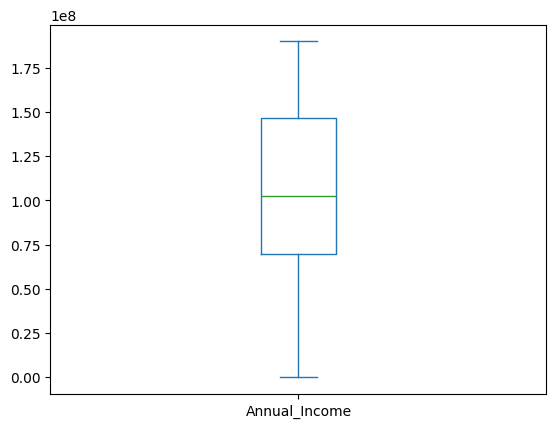

In [12]:
customer_merge['Annual_Income'].plot(kind='box')

In [13]:
gen = pd.crosstab(index=customer_merge['generation'],
                     columns=customer_merge['gender'],
                     colnames=[None])

gen

,Female,Male
generation,,
Boomers,127,90
Gen. X,204,110
Gen. Y (Millenials),216,143
Gen. Z (Zoomers),122,95


In [14]:
gen_income = customer_merge.groupby('generation')[['Annual_Income', 'Spending_Score']].mean()

gen_income = gen_income.dropna()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24040\539578301.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_income = customer_merge.groupby('generation')[['Annual_Income', 'Spending_Score']].mean()


In [15]:
gen_income = gen_income.reset_index()
gen_income

,generation,Annual_Income,Spending_Score
0,Boomers,1.146113e+08,51.465438
1,Gen. X,1.048226e+08,49.770701
2,Gen. Y (Millenials),1.022112e+08,50.270195
3,Gen. Z (Zoomers),1.066444e+08,51.686636


In [16]:
gen_income['Annual_Income'] = gen_income['Annual_Income']/1000000
gen_income
# in millions

,generation,Annual_Income,Spending_Score
0,Boomers,114.611313,51.465438
1,Gen. X,104.822551,49.770701
2,Gen. Y (Millenials),102.211167,50.270195
3,Gen. Z (Zoomers),106.644438,51.686636


In [17]:
plot_gen_income = px.bar(data_frame=gen_income,
                         x='generation', y=['Annual_Income', 'Spending_Score'],
             title='Comparison of Annual Income and Spending Score by Generation',
             labels={'value': 'Values', 'variable': 'Metric'},
             template='plotly_dark',
             barmode='group')

plot_gen_income

In [18]:
coord = pd.read_csv("data/coordinate.csv")
coord.head()

,province,latitude,longitude
0,ACEH,4.36855,97.02530
1,SUMATERA UTARA,2.19235,99.38122
2,SUMATERA BARAT,-1.34225,100.07610
3,RIAU,0.50041,101.54758
4,JAMBI,-1.61157,102.77970


In [19]:
prov_generation = pd.crosstab(index=customer_merge['province'],
                              columns=customer_merge['generation'],
                              )

prov_generation

generation,Boomers,Gen. X,Gen. Y (Millenials),Gen. Z (Zoomers)
province,,,,
ACEH,12,15,12,7
BALI,0,1,2,2
BANTEN,3,8,7,5
BENGKULU,5,6,4,7
DAERAH ISTIMEWA YOGYAKARTA,6,5,2,4
DKI JAKARTA,2,2,1,0
GORONTALO,1,7,4,3
JAMBI,9,6,8,4
JAWA BARAT,11,27,33,21


In [20]:
prov_generation['Total'] = prov_generation['Boomers']+prov_generation['Gen. X']+prov_generation['Gen. Y (Millenials)']+prov_generation['Gen. Z (Zoomers)']

In [21]:
df_map = prov_generation.merge(right=coord, on='province')

df_map.head()

,province,Boomers,Gen. X,Gen. Y (Millenials),Gen. Z (Zoomers),Total,latitude,longitude
0,ACEH,12,15,12,7,46,4.36855,97.02530
1,BALI,0,1,2,2,5,-8.23566,115.12239
2,BANTEN,3,8,7,5,23,-6.44538,106.13756
3,BENGKULU,5,6,4,7,22,-3.51868,102.53598
4,DAERAH ISTIMEWA YOGYAKARTA,6,5,2,4,17,-7.79560,110.36950


In [22]:
plot_map = px.scatter_mapbox(data_frame=df_map, lat='latitude', lon='longitude',
                             mapbox_style='carto-positron', zoom=3,
                             size='Total',
                             hover_name='province',
                             hover_data={'Boomers': True,
                                         'Gen. X': True,
                                         'Gen. Y (Millenials)': True,
                                         'Gen. Z (Zoomers)': True,
                                         'latitude': False,
                                         'longitude': False})

plot_map

In [23]:
customer_merge

,CustomerID,NIK,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size,province,city,district,gender,birth_datetime,birthday,age,regist_code,birth_year,generation
0,1,5203172209040014,15000000,39,Healthcare,1,4,NUSA TENGGARA BARAT,KAB. LOMBOK TIMUR,Labuhan Haji,Male,2004-09-22,22 September 2004,19,14,2004,Gen. Z (Zoomers)
1,2,1705032211020016,35000000,81,Engineer,3,3,BENGKULU,KAB. SELUMA,Talo,Male,2002-11-22,22 November 2002,21,16,2002,Gen. Z (Zoomers)
2,3,7606055105030001,86000000,6,Engineer,1,1,SULAWESI BARAT,KAB. MAMUJU TENGAH,Karossa,Female,2003-05-11,11 May 2003,20,1,2003,Gen. Z (Zoomers)
3,4,7317074601000015,59000000,77,Lawyer,0,2,SULAWESI SELATAN,KAB. LUWU,Belopa,Female,2000-01-06,06 January 2000,23,15,2000,Gen. Z (Zoomers)
4,5,3215114911920008,38000000,40,Entertainment,2,6,JAWA BARAT,KAB. KARAWANG,Cibuaya,Female,1992-11-09,09 November 1992,31,8,1992,Gen. Y (Millenials)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1989,1309107105690005,118944000,77,Artist,4,4,SUMATERA BARAT,KAB. KEPULAUAN MENTAWAI,Pagai Selatan,Female,1969-05-31,31 May 1969,54,5,1969,Gen. X
1103,1990,1808105401760019,75293000,55,Doctor,6,7,LAMPUNG,KAB. WAY KANAN,Gunung Labuhan,Female,1976-01-14,14 January 1976,47,19,1976,Gen. X
1104,1991,1604226904930019,166983000,69,Artist,7,3,SUMATERA SELATAN,KAB. LAHAT,Pagar Gunung,Female,1993-04-29,29 April 1993,30,19,1993,Gen. Y (Millenials)
1105,1994,1602144104590017,175254000,100,Artist,9,5,SUMATERA SELATAN,KAB. OGAN KOMERING ILIR,Air Sugihan,Female,1959-04-01,01 April 1959,64,17,1959,Boomers


In [24]:
profession_gen = pd.crosstab(index=customer_merge['Profession'],
                             columns = customer_merge['generation'],
                             colnames=[None])

profession_gen

,Boomers,Gen. X,Gen. Y (Millenials),Gen. Z (Zoomers)
Profession,,,,
Artist,77,92,118,68
Doctor,18,28,26,12
Engineer,19,32,23,19
Entertainment,15,36,41,22
Executive,9,25,33,16
Healthcare,47,58,59,38
Homemaker,5,9,13,9
Lawyer,13,21,28,15
Marketing,10,8,14,14


In [25]:
melt_gen_profession = profession_gen.melt(ignore_index=False, var_name='generation', value_name='num_people')

melt_gen_profession

,generation,num_people
Profession,,
Artist,Boomers,77
Doctor,Boomers,18
Engineer,Boomers,19
Entertainment,Boomers,15
Executive,Boomers,9
Healthcare,Boomers,47
Homemaker,Boomers,5
Lawyer,Boomers,13
Marketing,Boomers,10


In [26]:
melt_gen_profession = melt_gen_profession.reset_index().dropna()
melt_gen_profession.head()

,Profession,generation,num_people
0,Artist,Boomers,77
1,Doctor,Boomers,18
2,Engineer,Boomers,19
3,Entertainment,Boomers,15
4,Executive,Boomers,9


In [27]:
melt_gen_profession.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Profession  40 non-null     category
 1   generation  40 non-null     category
 2   num_people  40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 1.1 KB


In [29]:
plot_profession = px.bar(data_frame=melt_gen_profession.sort_values(by='num_people'), 
                   x='num_people', y='Profession', color='generation', barmode='group',
                   labels={'num_people': 'Profession Count',
                            'Profession': 'Profession',
                            'generation': 'Generation'},
                            category_orders={'generation': ['Boomers', 'Gen. X', 'Gen. Y (Millenials)', 'Gen. Z (Zoomers)']})
plot_profession

c:\Users\Lenovo\anaconda3\envs\dss_nik\lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

